The price of electricity depends on many factors. Predicting the price of electricity helps many businesses understand how much electricity they have to pay each year. The Electricity Price Prediction task is based on a case study where you need to predict the daily price of electricity based on the daily consumption of heavy machinery used by businesses. So if you want to learn how to predict the price of electricity, then this article is for you. In this article, I will walk you through the task of electricity price prediction with machine learning using Python.

# Electricity Price Prediction (Case Study)
Suppose that your business relies on computing services where the power consumed by your machines varies throughout the day. You do not know the actual cost of the electricity consumed by the machines throughout the day, but the organization has provided you with historical data of the price of the electricity consumed by the machines. Below is the information of the data we have for the task of forecasting electricity prices:

DateTime: Date and time of the record

Holiday: contains the name of the holiday if the day is a national holiday

HolidayFlag: contains 1 if it’s a bank holiday otherwise 0

DayOfWeek: contains values between 0-6 where 0 is Monday

WeekOfYear: week of the year

Day: Day of the date

Month: Month of the date

Year: Year of the date

PeriodOfDay: half-hour period of the day

ForcastWindProduction: forecasted wind production

SystemLoadEA forecasted national load

SMPEA: forecasted price

ORKTemperature: actual temperature measured

ORKWindspeed: actual windspeed measured

CO2Intensity: actual C02 intensity for the electricity produced

ActualWindProduction: actual wind energy production

SystemLoadEP2: actual national system load

SMPEP2: the actual price of the electricity consumed (labels or values to be predicted)


So your task here is to use this data to train a machine learning model to predict the price of electricity consumed by the machines. In the section below, I will take you through the task of electricity price prediction with machine learning using Python.



In [1]:
# Electricity Price Prediction using Python
# I will start the task of electricity price prediction by importing the necessary Python libraries and the dataset that we need for this task:

import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
print(data.head())


           DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00    None            0          1          44    1     11   
1  01/11/2011 00:30    None            0          1          44    1     11   
2  01/11/2011 01:00    None            0          1          44    1     11   
3  01/11/2011 01:30    None            0          1          44    1     11   
4  01/11/2011 02:00    None            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   
2  2011            2                 328.57      3060.71  49.10   
3  2011            3                 335.60      2945.56  48.04   
4  2011            4                 342.90      2849.34  33.75   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.7

/tmp/ipykernel_383284/2267394110.py:6: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

I can see that so many features with numerical values are string values in the dataset and not integers or float values. So before moving further, we have to convert these string values to float values:

In [3]:
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [4]:
# Now let’s have a look at whether this dataset contains any null values or not:
data.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [5]:
# So there are some columns with null values, I will drop all these rows containing null values from the dataset:
data= data.dropna()

In [6]:
data

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


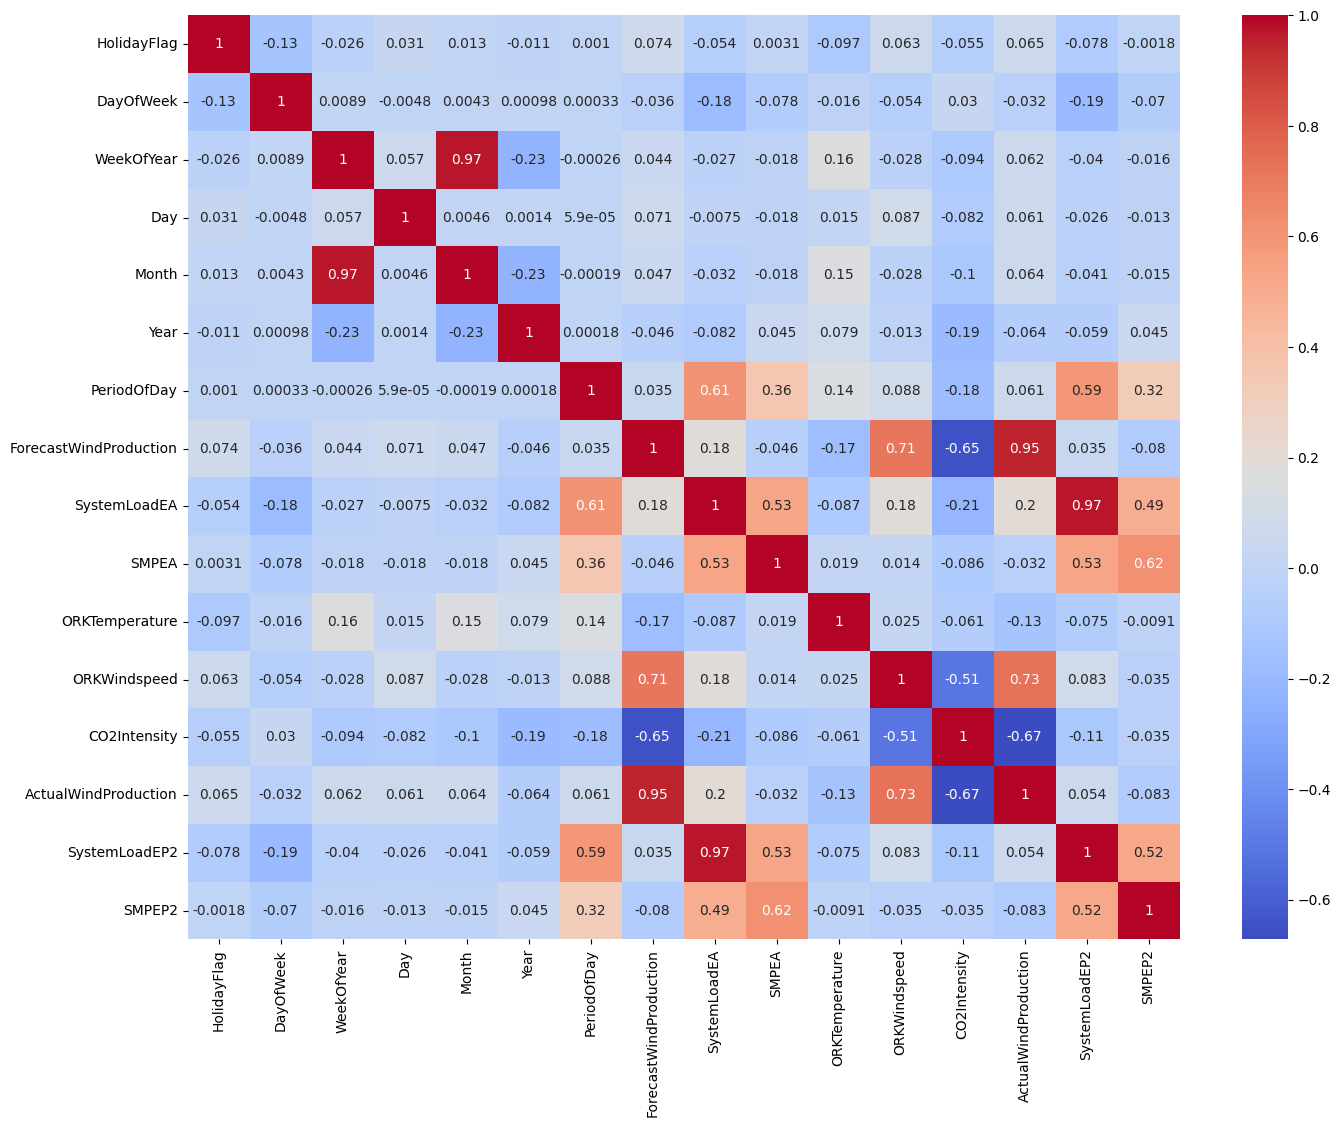

In [10]:
# Now let’s have a look at the correlation between all the columns in the dataset:


import seaborn as sns
import matplotlib.pyplot as plt

correlations = data.corr(method='pearson')

plt.figure(figsize=(16,12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()



# Electricity Price Prediction Model
Now let’s move to the task of training an electricity price prediction model. Here I will first add all the important features to x and the target column to y, and then I will split the data into training and test sets:

In [11]:

x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

## As this is the problem of regression, so here I will choose the Random Forest regression algorithm to train the electricity price prediction model:

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

Now let’s input all the values of the necessary features that we used to train the model and have a look at the price of the electricity predicted by the model:

In [13]:
#features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

/home/nsl47/anaconda3/envs/bd/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([68.3945])

So this is how you can train a machine learning model to predict the prices of electricity.

## Summary

Predicting the price of electricity helps a lot of companies to understand how much electricity expenses they have to pay every year. I hope you liked this article on the task of electricity price prediction with machine learning using Python. Feel free to ask your valuable questions in the comments section below.